# Exercise 3 and 4  
  
I just merge exercise 3 and 4 together.  
The problrm I design is finding feature in original.  
In my problem, feature is a image with 'e'  
The original image is a screenshot from a pdf.

In [1]:
from PIL import Image
import cv2 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc  

## Detection 

In order to make the detection better, I use binaryzation to original image and feature.  
The method I use to detect the feature is that using the same area with feature in the original. I call this area is test area.  
I let the pixel of each point in test area subtract the corresponding point in feature.   
Add all the pixel abstract of points in test area.  
Then let the sum divide the size of feature.  
So the results of the hole calculation is the average pixel subtrast.  
The average pixel subtrast shows how match the test area and the original image.  
I set threshold value, if the result less than threshold value, I will regard as detecting the feature.  
Then I use rectangle to mark the test area.  
With debuging, I find that if I just let the test area move one pixel by one pixel, the rectangle may be coincide. So I set two array to save the pixel of the test area which has detected feature successfully.  
So if we has detected the feature, the next detection will start in the pixel which is a width of feature far from the left top point of the last test area. And if a row has the feature, the detection will jump to the colmu which is a length far away last colum.   
For example:   
If the width of feature is w and the length of feature is l.  
If the point(a,b) is the left top of the test area which detect the feature succssfully.  
The next detection will start at the point (a,b+w) rather than (a,b+1).  
After finish the row a, we do fing the feature in this row. So the nexr detection will start at point (a+l,0) rather than (a+1,0).  

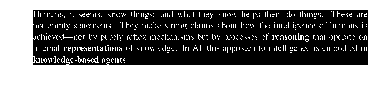

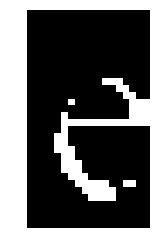

130


True

In [2]:
# Original image:
img_lecture = cv2.imread("lecture.jpg")  
img_lecture_gray= cv2.cvtColor(img_lecture, cv2.COLOR_BGR2GRAY) 
  
img_lecture_bw=img_lecture_gray 
cv2.threshold(img_lecture_gray, 100, 255, cv2.THRESH_BINARY_INV,img_lecture_bw)  
plt.figure()
plt.imshow(img_lecture_bw,'gray')
plt.axis('off')
plt.show()
  
cv2.imwrite('lecture_bw.jpg',img_lecture_bw)  

# Feature: 
img_feature = cv2.imread("feature.jpg")   
img_feature_gray= cv2.cvtColor(img_feature, cv2.COLOR_BGR2GRAY)   

img_feature_bw = img_feature_gray  
cv2.threshold(img_feature_gray  , 100, 255, cv2.THRESH_BINARY_INV,img_feature_bw)  
plt.figure()
plt.imshow(img_feature_bw,'gray')
plt.axis('off')
plt.show()
 
cv2.imwrite('feature_bw.jpg', img_feature_bw)

size = img_lecture_bw.shape
x=size[0]
y=size[1]
size = img_feature_bw.shape
x_t=size[0]
y_t=size[1]
z=x_t*y_t
img1=np.array(img_lecture_bw)
img2=np.array(img_feature_bw)

count=0
count1=0
temp3=np.zeros(x)
temp4=np.zeros(y)
for i in range (0,x-x_t):
    temp4=np.zeros(y)
    if (temp3[i]!=0):
        continue
    else:
        for j in range (0,y-y_t):
            if (temp4[j]!=0):
                continue
            else:    
                temp=0
                temp1=0
                temp2=0
                for ii in range (x_t):
                    for jj in range (y_t):
                        temp=(int(img1[i+ii,j+jj])-int(img2[ii,jj]))
                        if (temp<0):
                            temp=-temp
                        temp1=temp1+temp
                        count1=count1+1        
                temp2=int(temp1/z)
                if (temp2<44):#threshold value
                    count=count+1
                    cv2.rectangle(img_lecture,(j,i),(j+y_t,i+x_t),(55,255,155))
                    for m in range (i,i+x_t):
                        temp3[m]=1
                    for n in range (j,j+y_t):
                        temp4[n]=1
print(count)
cv2.imwrite('1.jpg', img_lecture)

## ROC curve    
The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.   
To draw the ROC curve, we need TPR and FPR.  
$TPR=\dfrac{TP}{TP+FN}$  $FPR=\dfrac{FP}{FP+FN}$  
TP+FN:sum of Condition positive  FP+FN=Condition negative  
In the original, there are 306 characters.40 of them are "e".   

So TP+FN=40 and FP+FN=266

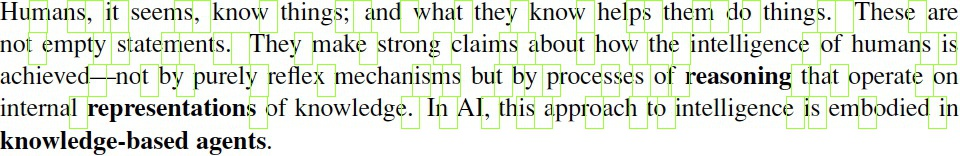

First, the threshold is 40, here is result.  
There are 69 rectangles. Only 7 rectangles include real "e" or part include e.  
$TPR=\dfrac{7}{40}=0.18$  
$FPR=\dfrac{62}{266}=0.23$

Then I change threshold and record the TPR and FPR.  
Threshold=40, TPR=0.18 FPR=0.23  
Threshold=42, TPR=0.30 FPR=0.26  
Threshold=44, TPR=0.41 FPR=0.4  
Here is the roc curve.  

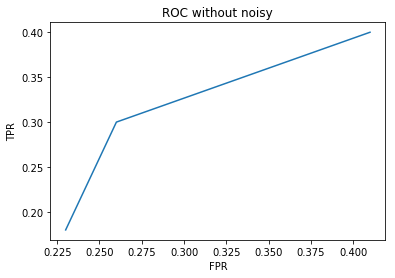

In [3]:
x = [0.23,0.26,0.41]  
y = [0.18,0.3,0.4]
plt.title('ROC without noisy')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(x,y) 

Now, I add noisy into image

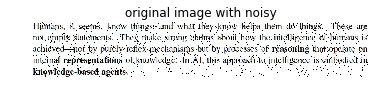

True

In [4]:
img_n=np.array(cv2.imread('lecture.jpg'))
a=img_n.shape
rows=a[0]
cols=a[1]               
for i in range(5000):
    x=np.random.randint(0,rows)
    y=np.random.randint(0,cols)
    img_n[x,y,:]=0
    
plt.figure()    
plt.title('original image with noisy')
plt.imshow(img_n)
plt.axis('off')
plt.show()    
cv2.imwrite('lecture_noisy.jpg',img_n)

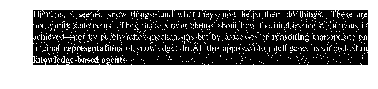

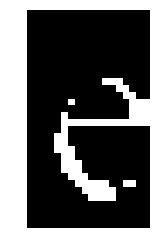

172


True

In [5]:
# Original image:
img_lecture = cv2.imread("lecture_noisy.jpg")  
img_lecture_gray= cv2.cvtColor(img_lecture, cv2.COLOR_BGR2GRAY) 
  
img_lecture_bw=img_lecture_gray 
cv2.threshold(img_lecture_gray, 100, 255, cv2.THRESH_BINARY_INV,img_lecture_bw)  
plt.figure()
plt.imshow(img_lecture_bw,'gray')
plt.axis('off')
plt.show()
  
cv2.imwrite('lecture_bw.jpg',img_lecture_bw)  

# Feature: 
img_feature = cv2.imread("feature.jpg")   
img_feature_gray= cv2.cvtColor(img_feature, cv2.COLOR_BGR2GRAY)   

img_feature_bw = img_feature_gray  
cv2.threshold(img_feature_gray  , 100, 255, cv2.THRESH_BINARY_INV,img_feature_bw)  
plt.figure()
plt.imshow(img_feature_bw,'gray')
plt.axis('off')
plt.show()
 
cv2.imwrite('feature_bw.jpg', img_feature_bw)

size = img_lecture_bw.shape
x=size[0]
y=size[1]
size = img_feature_bw.shape
x_t=size[0]
y_t=size[1]
z=x_t*y_t
img1=np.array(img_lecture_bw)
img2=np.array(img_feature_bw)

count=0
count1=0
temp3=np.zeros(x)
temp4=np.zeros(y)
for i in range (0,x-x_t):
    temp4=np.zeros(y)
    if (temp3[i]!=0):
        continue
    else:
        for j in range (0,y-y_t):
            if (temp4[j]!=0):
                continue
            else:    
                temp=0
                temp1=0
                temp2=0
                for ii in range (x_t):
                    for jj in range (y_t):
                        temp=(int(img1[i+ii,j+jj])-int(img2[ii,jj]))
                        if (temp<0):
                            temp=-temp
                        temp1=temp1+temp
                        count1=count1+1        
                temp2=int(temp1/z)
                if (temp2<54):#threshold value
                    count=count+1
                    cv2.rectangle(img_lecture,(j,i),(j+y_t,i+x_t),(55,255,155))
                    for m in range (i,i+x_t):
                        temp3[m]=1
                    for n in range (j,j+y_t):
                        temp4[n]=1
print(count)
cv2.imwrite('1.jpg', img_lecture)

Threshold=50, TPR=0.24 FPR=0.06  
Threshold=52, TPR=0.62 FPR=0.13  
Threshold=54, TPR=0.90 FPR=0.18  
The Roc curve of noisy condition

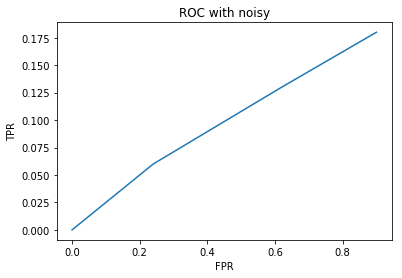

In [6]:
x = [0,0.24,0.62,0.90]  
y = [0,0.06,0.13,0.18]
plt.title('ROC with noisy')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(x,y) 

According to the results, the roc curve performance better in the condition without noisy. But I do not think my detection is good.  
Firstly, I make the feature by hand. So the feature may not appropriate to the original image. There should be a better way to make the feature. I think I should make the feature like a pixel matrix. For example, if the original lecture image has r rows and the length of the image is L, the length of letter feature image should be L/R.  
Secondly,the method to calculate threshold may not great.  
Thridly, I did not collect enough data to draw the roc curve.  
I think I still need to study a lot. 